In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [77]:
df = pd.read_csv("Mall_Customers.csv")

In [78]:
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
177,178,Male,27,88,69
72,73,Female,60,50,49
56,57,Female,51,44,50
183,184,Female,29,98,88
73,74,Female,60,50,56


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [80]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [81]:
df.isnull().mean()

CustomerID                0.0
Gender                    0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

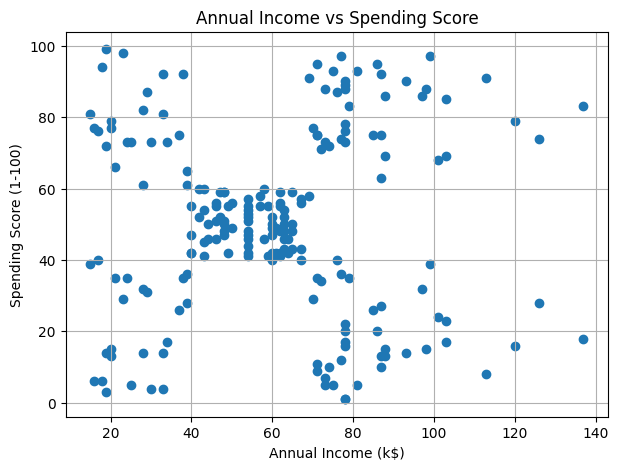

In [82]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

plt.figure(figsize=(7,5))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income vs Spending Score")
plt.grid(True)
plt.show()



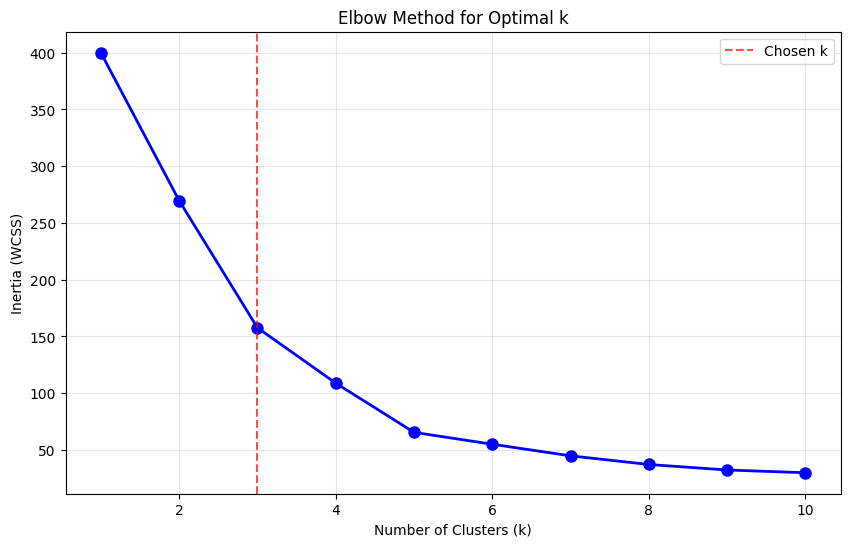

In [83]:
# Elbow method to find optimal number of clusters
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X_scaled)
    inertias.append(kmeans_temp.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True, alpha=0.3)
plt.axvline(x=3, color='red', linestyle='--', alpha=0.7, label='Chosen k')
plt.legend()
plt.show()


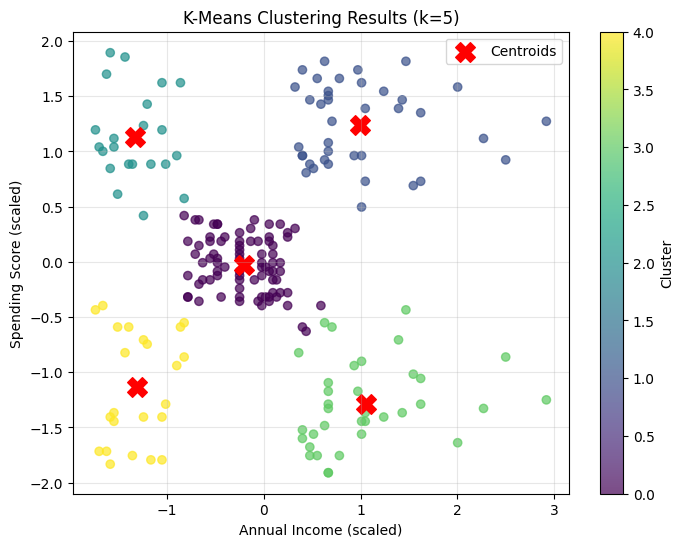

In [88]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X_scaled)
centroids = kmeans.cluster_centers_

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X_scaled[:, 0],
    X_scaled[:, 1],
    c=labels_kmeans, 
    cmap='viridis', 
    alpha=0.7
)

plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    s=200,
    c='red',
    marker='X',
    label='Centroids'
)

plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title(f"K-Means Clustering Results (k={k})")
plt.legend()
plt.colorbar(scatter, label="Cluster")
plt.grid(True, alpha=0.3)
plt.show()


Hierarchical clustering assignments:
[32 85 39 21 23]


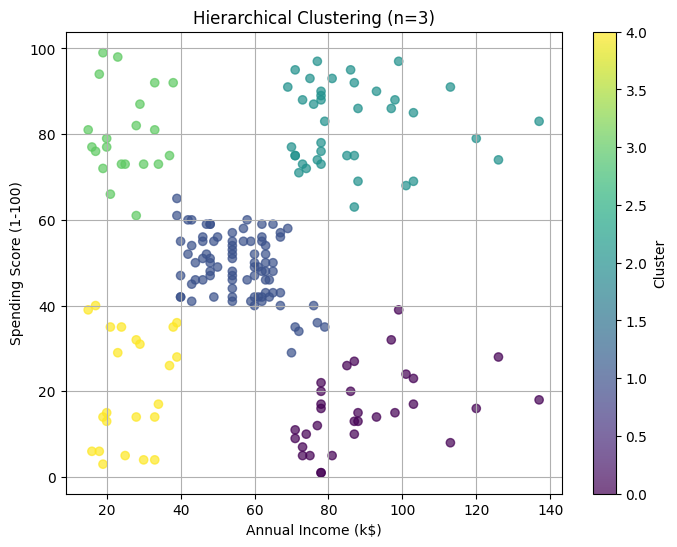

In [91]:
hierarchical = AgglomerativeClustering(n_clusters=5, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X)

print("Hierarchical clustering assignments:")
print(np.bincount(hierarchical_labels))

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X['Annual Income (k$)'],
    X['Spending Score (1-100)'],
    c=hierarchical_labels,
    cmap='viridis',
    alpha=0.7
)

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Hierarchical Clustering (n=3)")
plt.colorbar(scatter, label="Cluster")
plt.grid(True)
plt.show()


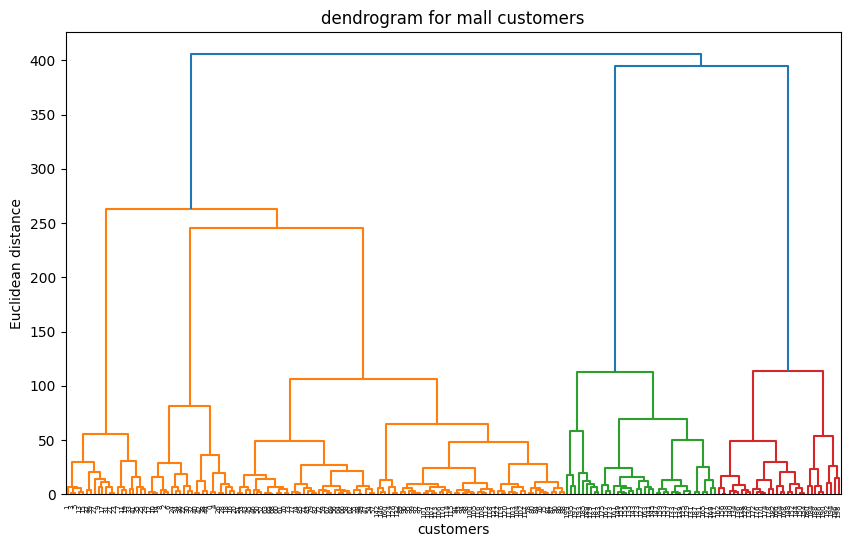

In [92]:
from scipy.cluster.hierarchy import dendrogram,linkage
linked=linkage(X[['Annual Income (k$)','Spending Score (1-100)']],method='ward')

plt.figure(figsize=(10,6))
dendrogram(linked)
plt.title('dendrogram for mall customers')
plt.xlabel('customers')
plt.ylabel('Euclidean distance')
plt.show()

DBSCAN clustering assignments:
Noise points: 8
Cluster 0: 157 points
Cluster 1: 35 points

Number of clusters: 2
Number of noise points: 8


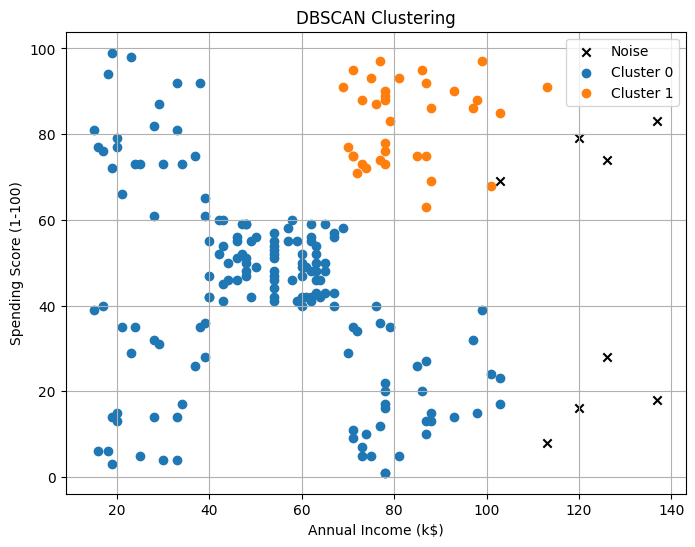

In [94]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

unique_labels = np.unique(dbscan_labels)
print("DBSCAN clustering assignments:")
for label in unique_labels:
    if label == -1:
        print(f"Noise points: {np.sum(dbscan_labels == label)}")
    else:
        print(f"Cluster {label}: {np.sum(dbscan_labels == label)} points")

print(f"\nNumber of clusters: {len(unique_labels) - (1 if -1 in unique_labels else 0)}")
print(f"Number of noise points: {np.sum(dbscan_labels == -1)}")

plt.figure(figsize=(8,6))

for label in unique_labels:
    mask = dbscan_labels == label
    if label == -1:
        plt.scatter(
            X['Annual Income (k$)'][mask],
            X['Spending Score (1-100)'][mask],
            c='black',
            marker='x',
            label='Noise'
        )
    else:
        plt.scatter(
            X['Annual Income (k$)'][mask],
            X['Spending Score (1-100)'][mask],
            label=f'Cluster {label}'
        )

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("DBSCAN Clustering")
plt.legend()
plt.grid(True)
plt.show()


**1. Optimal Clusters**

K-Means:  Using the Elbow Method, the WCSS plot suggested k = 3 as the point where adding more clusters yields minimal reduction in WCSS.

Hierarchical Clustering: From the dendrogram, cutting at 3 clusters preserves the main structure while avoiding over-segmentation.


**2. Cluster Comparison**

K-Means vs Hierarchical: Both methods produced similar overall cluster patterns.


K-Means creates spherical clusters, while Hierarchical clusters can have irregular shapes.

DBSCAN:Detected 2 dense clusters and 8 noise points.

**3. DBSCAN Performance:**

DBSCAN found 2 main clusters in the dataset:

Cluster 0: 157 customers

Cluster 1: 35 customers

Noise: 8 point are labeled as Noise Point.

DBSCAN identified 2 main clusters: Cluster 0 with 157 customers and Cluster 1 with 35 customers. Additionally, 8 points were labeled as noise, representing outliers with unusual income or spending patterns

**4. Algorithm Suitability**

K-Means and Hierarchical are most suitable for this dataset because clusters are compact and roughly spherical space.

DBSCAN is less suitable for overall segmentation but valuable for highlighting outliers.

**5. Real-World Application**

The mall can use these clusters for targeted marketing campaigns:

Noise points (DBSCAN): Investigate unusual customers, detect potential fraud, or create specialized campaigns.

Low Income, High Spending Score: Offer budget-friendly deals or seasonal promotions.

High Income, Low Spending Score: Provide personalized promotions or targeted incentives to increase spending.

High Income, High Spending Score: Offer premium loyalty programs, VIP events, and exclusive discounts.
